In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=sns.load_dataset('iris')

In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [18]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [36]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

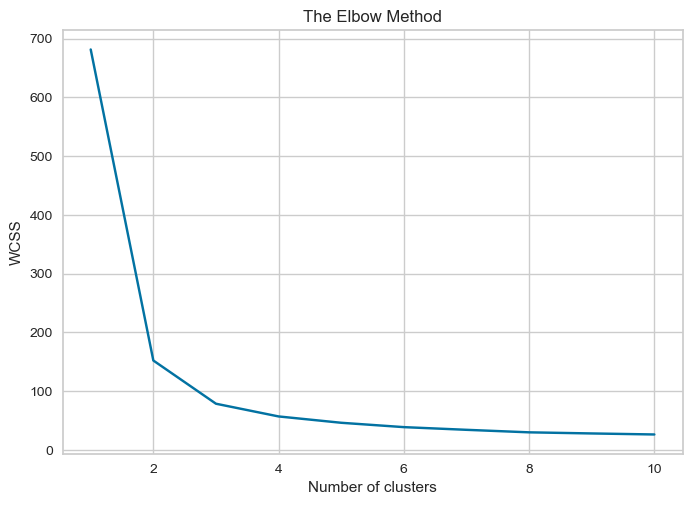

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

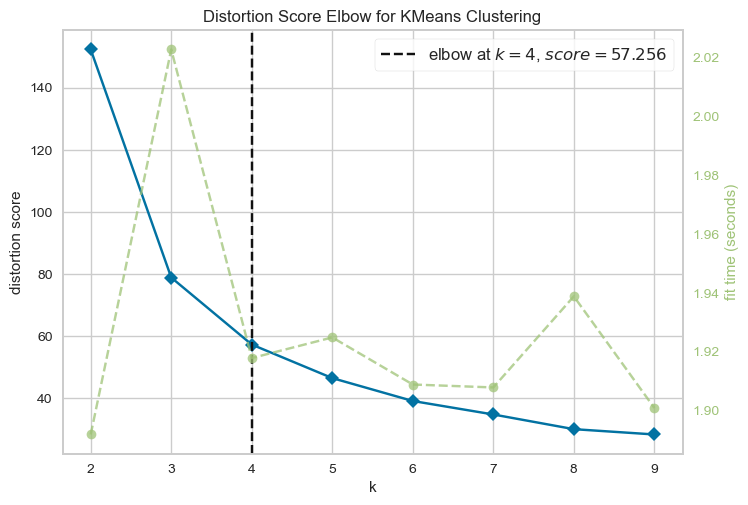

In [38]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

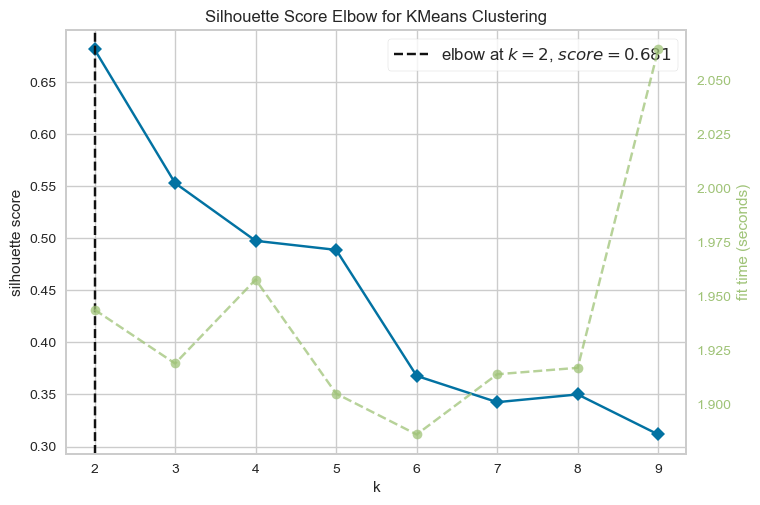

In [39]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X)
visualizer.show()
plt.show()

In [44]:
# apply K-means clustering
kmeans=KMeans(n_clusters=3,random_state=42)
data['cluster']=kmeans.fit_predict(X)

In [41]:
# Add cluster centers
cluster_centers=pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)

In [42]:
cluster_centers

,sepal_length,sepal_width,petal_length,petal_width
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


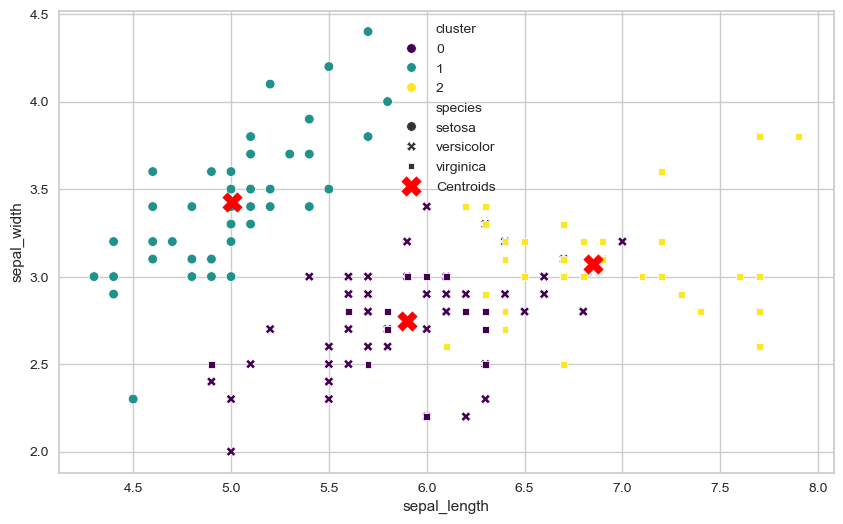

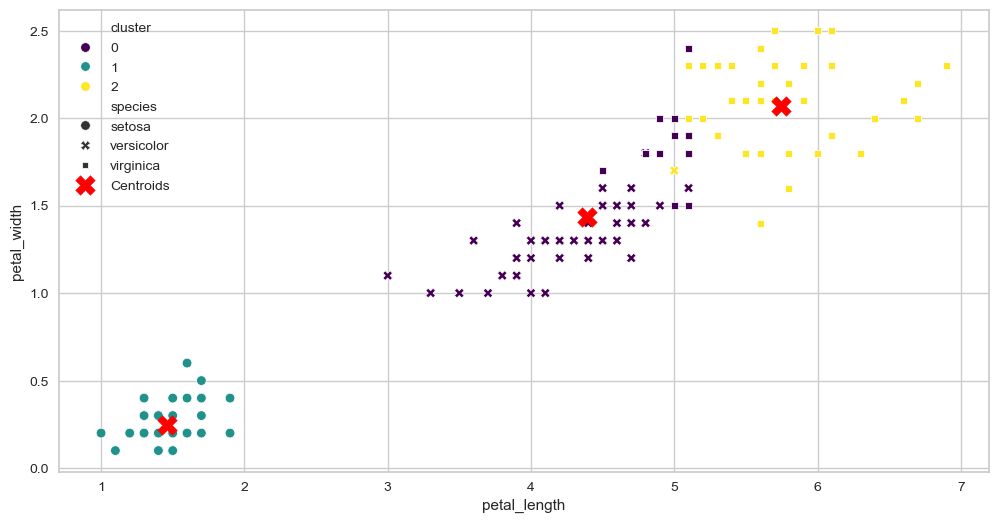

In [43]:
# plot using seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='sepal_length',y='sepal_width',hue='cluster',palette='viridis',style='species')
plt.scatter(cluster_centers['sepal_length'],cluster_centers['sepal_width'],color='red',marker='X',s=200,label = 'Centroids')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x='petal_length',y='petal_width',hue='cluster',palette='viridis',style='species')
plt.scatter(cluster_centers['petal_length'],cluster_centers['petal_width'],color='red',marker='X',s=200,label='Centroids');
plt.legend()
plt.show()
